# EL Niño-Southern Oscillation (ENSO) Winter Snowfall Depth Analysis

## Research Questions (Q):
1. Has annual snowfall and or snow depth been significantly decreasing since 1970?
2. What have been the peak snowfall and depths for each decade?
3. What have been the minumum snowfall and depths for each decade?
4. What have been the average and median snowfall and depths for each decade?
5. Which area/s get the most and least snowfall or have the highest and lowest snow depth?
6. How much will snowfall/depth decrease or increase by 2034 and 2124?
7. If snowfall is decreasing, which area will have the least decrease in April 1st snow depth amounts?
8. What year is the sea surface temperature anomaly predicted to get above 1 degree and what snowfall/depth amounts could we expect to see?

## Research Hypothesis (H):
1. El Niño results in lower than average snowfall and snow depths compared to neutral years.
2. La Niña results in higher than average snowfall and snow depths compared to neutral years. 
3. Rising sea sea surface temperatures have resulted lesser snowfall and depth over time.
4. Years with temperature anomalies that are in above average cateogories result in lesser snowfall or depth.
5. Years with temperature anamalies that are in above average categories result in the increased likelihood of being an El Niño winter.
6. Years with temperature anomalies that are in below average categories result in increased snowfall or snow depth. 
7. Years with temperature anomalies that are in below average categories result in an increased likelihood of being a La Niña winter.
8. Higher active storm patterns preceding the respective winter result in greater snowfall or depth amounts.
9. Higher named hurricane occurances indicate an increased likelihood of having greater snowfall and snow depths.

#### Key notes: 
* This analsyis is not meant to find causation, but to draw conclusions from correlations. 
* Snow depth amounts were from April 1st of the respective year. 

#### The following are links to the resources used to gather the data:
* Mount Baker ski area snowfall data [link](https://www.mtbaker.us/the-mountain/snowfall-statistics/) 
* North Atlantic historical storm data [link](https://tropical.atmos.colostate.edu/Realtime/index.php?arch&loc=northatlantic)
* Sea surface temperature data [link](https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature)
* Mountain snow depth/snowpack data [link](https://climate.washington.edu/climate-data/snowdepth/)
* Oceanic Niño Index (ONI) 3-month running mean average data[link](https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php)
* El Niño-Southern Oscillation (ENSO) description [link](https://www.weather.gov/mhx/ensowhat#:~:text=The%20El%20Ni%C3%B1o%2DSouthern%20Oscillation,and%20eastern%20tropical%20Pacific%20Ocean)
* Hyak snowfall data [link](http://hyak.net/snowfallhist.html)
* Paradise Mount Rainier snowfall data [link](https://www.nps.gov/mora/planyourvisit/annual-snowfall-totals.htm)

#### References:
* Time series prediction tutorial via this [video](https://www.youtube.com/watch?v=oeo1IpLoSuw&t=820s)

#### Step 1: Look and explore the dataset, some initial data transormation
* Load the dataset
* Do some initial data exploration on the dataset
* Documentation to on what needs to be added and come up with strategy for missing data

In [1]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

import sys
from sklearn.metrics import mean_absolute_error, r2_score
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.fbprophet import Prophet

In [2]:
# load the dataset 
enso = pd.read_excel('enso_raw.xlsx')

In [3]:
# Check data types
enso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            55 non-null     int64  
 1   Baker Snowfall                  53 non-null     float64
 2   Paradise Snowfall               54 non-null     float64
 3   Hyak Snowfall                   51 non-null     float64
 4   Crystal Mountain Snow Depth     54 non-null     float64
 5   Mission Ridge Snow Depth        49 non-null     object 
 6   Mt Baker Ski Area Snow Depth    52 non-null     float64
 7   Paradise Snow Depth             54 non-null     float64
 8   Snoqualmie Pass Snow Depth      53 non-null     float64
 9   Stampede Pass Snow Depth        52 non-null     float64
 10  Stevens Pass Snow Depth         54 non-null     float64
 11  DJF                             55 non-null     float64
 12  JFM                             55 non

* Year should be changed to a date format for time series analysis
* Mission ridge snowdepth needs to be changed to a float data type

In [4]:
enso['Mission Ridge Snow Depth'].head()

0    NaN
1    NaN
2     56
3     26
4     20
Name: Mission Ridge Snow Depth, dtype: object

In [5]:
enso.head()

,Year,Baker Snowfall,Paradise Snowfall,Hyak Snowfall,Crystal Mountain Snow Depth,Mission Ridge Snow Depth,Mt Baker Ski Area Snow Depth,Paradise Snow Depth,Snoqualmie Pass Snow Depth,Stampede Pass Snow Depth,...,OND,NDJ,Sea Temperature Annual Anomaly,Named Storms (Prior Year),Named Storm Days,Hurricanes,Hurricane Days,Major Hurricanes,Major Hurricane Days,Accumulated Cyclone Energy
0,1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.8,0.6,-0.096,8,33.75,5,11.75,0,0.0,45.1
1,1970,NaN,649.0,383.0,63.0,NaN,NaN,135.0,78.0,116.0,...,-0.9,-1.1,-0.294,18,92.25,12,40.25,5,6.5,165.7
2,1971,1063.0,884.0,492.0,111.0,56,268.0,271.0,NaN,171.0,...,-1.0,-0.9,-0.510,10,30.25,5,6.75,2,1.0,40.2
3,1972,1008.0,1122.0,600.0,89.0,26,204.0,268.0,125.0,140.0,...,2.1,2.1,-0.186,13,63.00,6,28.75,1,1.0,96.8
4,1973,612.0,577.0,233.0,43.0,20,141.0,122.0,45.0,66.0,...,-1.9,-2.0,-0.150,7,30.75,3,6.25,0,0.0,35.6


In [6]:
# Convert the Mission Ridge Snow Depth column to a float
enso['Mission Ridge Snow Depth'] = pd.to_numeric(enso['Mission Ridge Snow Depth'], errors = 'coerce')

In [7]:
enso['Mission Ridge Snow Depth'].dtype 

dtype('float64')

In [8]:
# Convert the year column to date year date format
enso['Year'] = pd.to_datetime(enso['Year'], format = '%Y').dt.year

In [9]:
enso['Year'].head()

0    1969
1    1970
2    1971
3    1972
4    1973
Name: Year, dtype: int32

In [10]:
enso['Year'].dtype

dtype('int32')

In [11]:
enso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            55 non-null     int32  
 1   Baker Snowfall                  53 non-null     float64
 2   Paradise Snowfall               54 non-null     float64
 3   Hyak Snowfall                   51 non-null     float64
 4   Crystal Mountain Snow Depth     54 non-null     float64
 5   Mission Ridge Snow Depth        47 non-null     float64
 6   Mt Baker Ski Area Snow Depth    52 non-null     float64
 7   Paradise Snow Depth             54 non-null     float64
 8   Snoqualmie Pass Snow Depth      53 non-null     float64
 9   Stampede Pass Snow Depth        52 non-null     float64
 10  Stevens Pass Snow Depth         54 non-null     float64
 11  DJF                             55 non-null     float64
 12  JFM                             55 non

In [12]:
enso.describe()

,Year,Baker Snowfall,Paradise Snowfall,Hyak Snowfall,Crystal Mountain Snow Depth,Mission Ridge Snow Depth,Mt Baker Ski Area Snow Depth,Paradise Snow Depth,Snoqualmie Pass Snow Depth,Stampede Pass Snow Depth,...,OND,NDJ,Sea Temperature Annual Anomaly,Named Storms (Prior Year),Named Storm Days,Hurricanes,Hurricane Days,Major Hurricanes,Major Hurricane Days,Accumulated Cyclone Energy
count,55.00000,53.000000,54.000000,51.000000,54.000000,47.000000,52.000000,54.000000,53.000000,52.000000,...,55.000000,54.000000,52.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1996.00000,653.471698,687.351852,366.333333,72.092593,46.531915,166.980769,172.370370,77.660377,89.519231,...,-0.010909,-0.059259,0.204462,12.636364,59.427273,6.490909,23.095455,2.563636,5.531818,102.434545
std,16.02082,183.554394,162.663927,124.091848,26.265889,14.644855,53.821962,48.318634,34.644315,34.083801,...,1.149504,1.151622,0.352358,5.179603,27.895210,2.898740,14.049062,1.782254,5.474701,59.361969
min,1969.00000,277.000000,266.000000,87.000000,6.000000,20.000000,17.000000,73.000000,2.000000,17.000000,...,-1.900000,-2.000000,-0.510000,4.000000,14.500000,2.000000,3.250000,0.000000,0.000000,17.400000
25%,1982.50000,531.000000,589.250000,300.000000,60.000000,37.500000,138.250000,136.500000,54.000000,65.000000,...,-0.900000,-0.975000,-0.015000,8.500000,37.500000,4.000000,11.250000,1.000000,1.000000,50.250000
50%,1996.00000,633.000000,677.500000,359.000000,70.000000,47.000000,168.500000,167.000000,78.000000,83.500000,...,-0.200000,-0.150000,0.156000,12.000000,57.000000,6.000000,21.250000,2.000000,4.000000,92.900000
75%,2009.50000,786.000000,750.000000,424.000000,89.000000,55.000000,197.250000,206.000000,96.000000,116.500000,...,0.850000,0.775000,0.430500,15.000000,80.000000,8.000000,31.125000,3.500000,9.000000,143.500000
max,2023.00000,1140.000000,1122.000000,692.000000,144.000000,86.000000,311.000000,280.000000,153.000000,171.000000,...,2.600000,2.600000,0.930000,30.000000,126.250000,15.000000,61.500000,7.000000,22.250000,245.300000


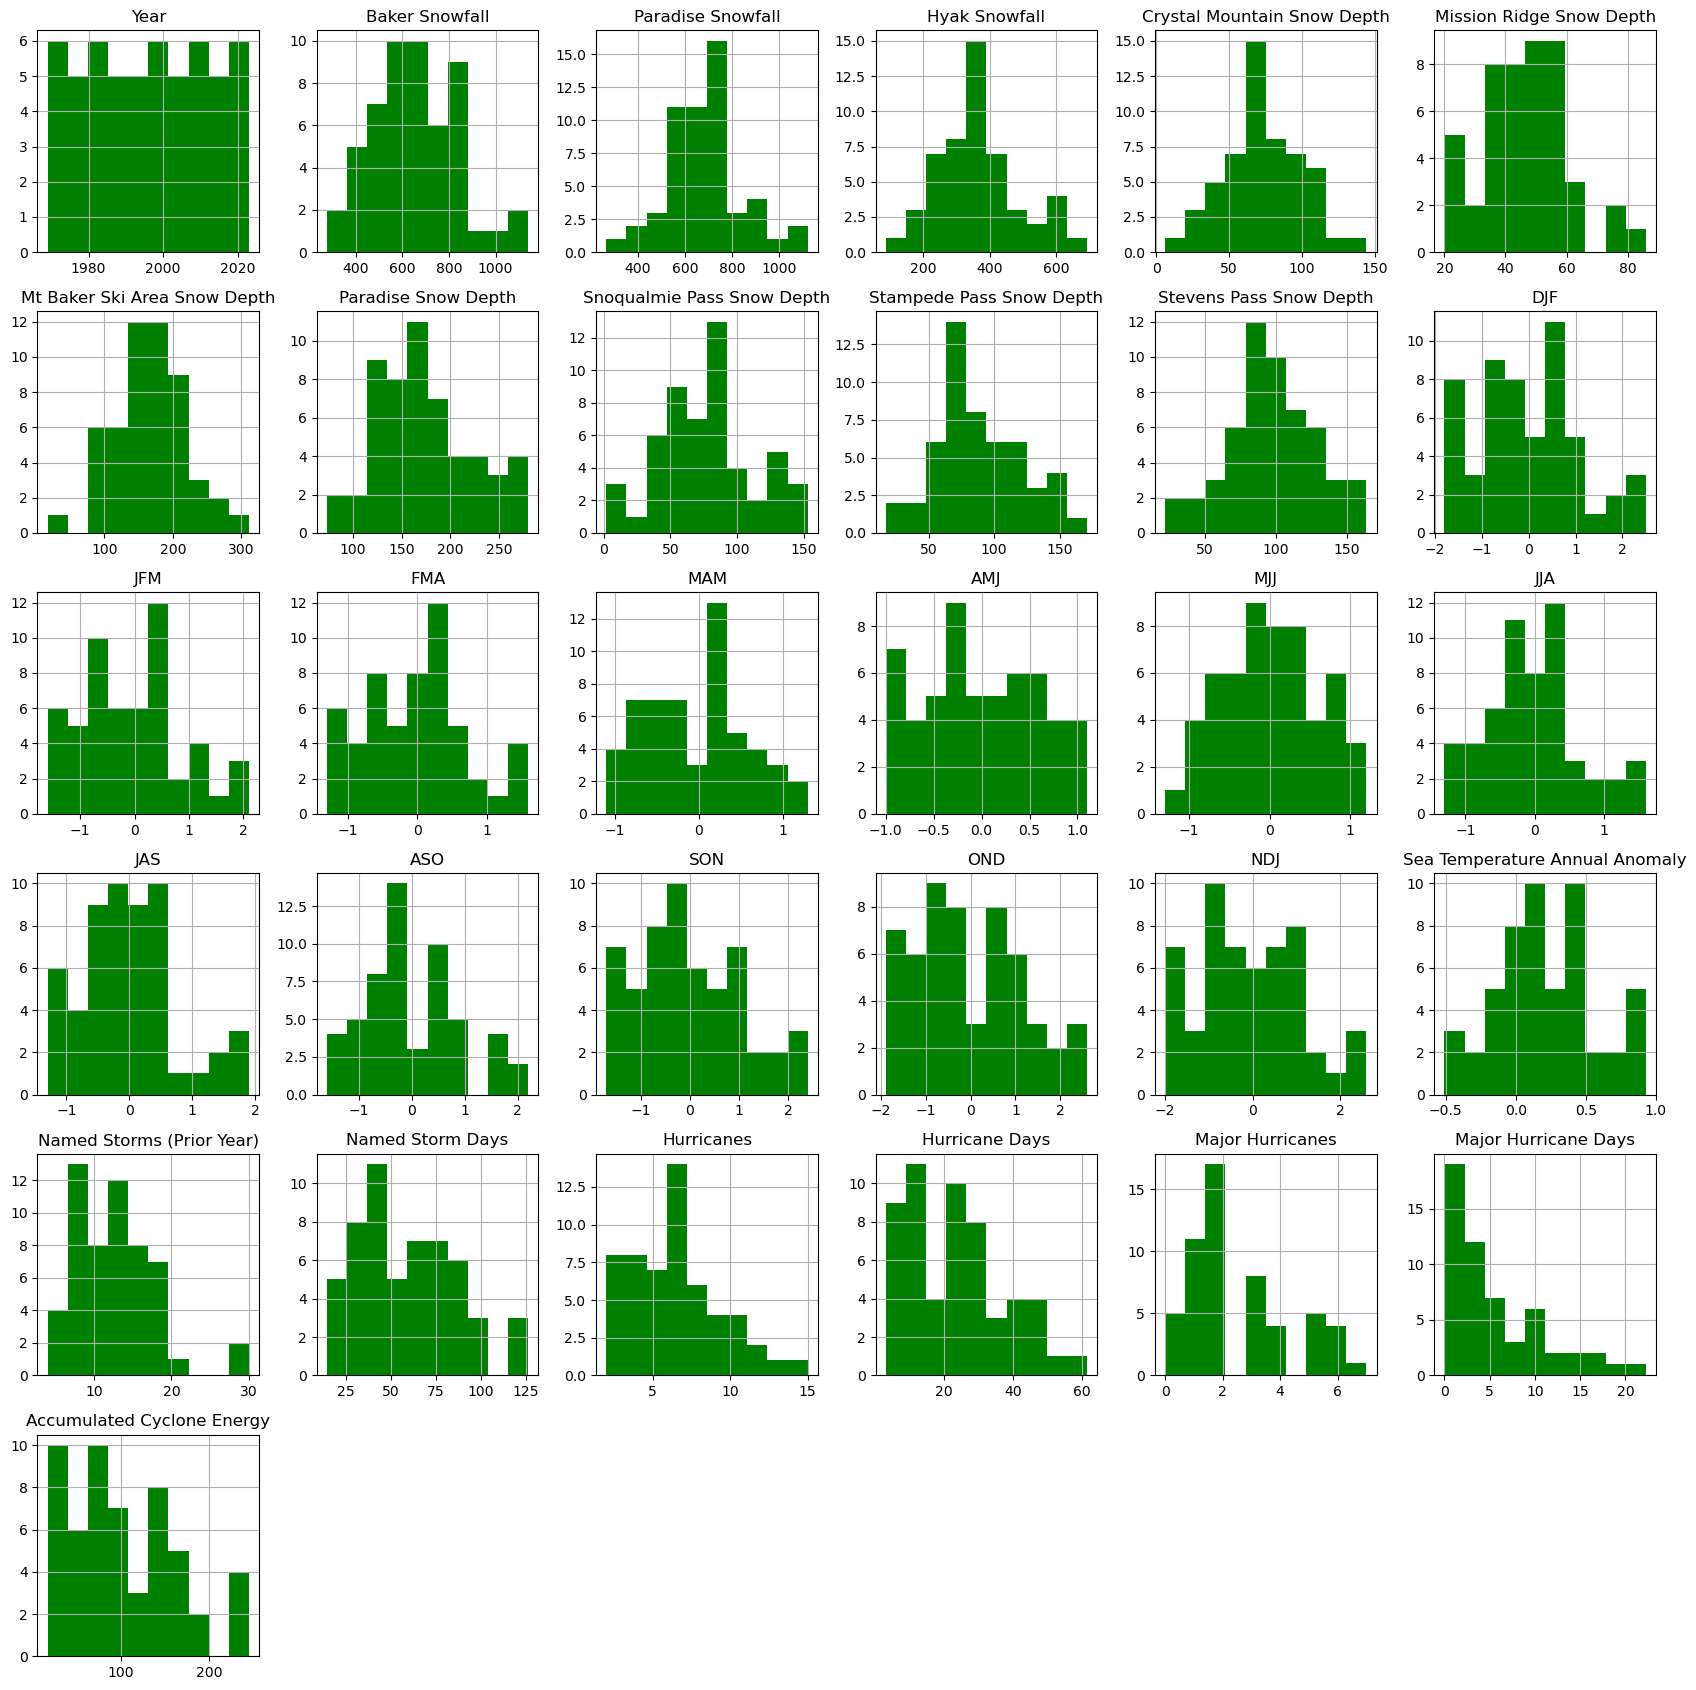

In [13]:

enso.hist(figsize = (17, 17), color = 'green')
plt.tight_layout()
plt.show()

* There are a series of columns in this DataFrame that are Oceanic Niño Index (ONI)[3 month running mean of ERSST.v5 SST anomalies in the Niño 3.4 region (5oN-5oS, 120o-170oW)] values.
* Considering that the winter resort season can be impacted by snowfall from October through April, the following three-month running mean averages will be added and then divided to find the mean; 
    * OND (October, November, December)
    * NDJ (November, December, January)
    * DJF (December, January, February)
    * JFM (January, February, March) 
    * FMA (February, March April)
    * MAM (March, April, May)

In [14]:
enso[['Year','DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ']].head()

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
0,1969,1.1,1.1,0.9,0.8,0.6,0.4,0.4,0.5,0.8,0.9,0.8,0.6
1,1970,0.5,0.3,0.3,0.2,0.0,-0.3,-0.6,-0.8,-0.8,-0.7,-0.9,-1.1
2,1971,-1.4,-1.4,-1.1,-0.8,-0.7,-0.7,-0.8,-0.8,-0.8,-0.9,-1.0,-0.9
3,1972,-0.7,-0.4,0.1,0.4,0.7,0.9,1.1,1.4,1.6,1.8,2.1,2.1
4,1973,1.8,1.2,0.5,-0.1,-0.5,-0.9,-1.1,-1.3,-1.5,-1.7,-1.9,-2.0


#### Calculating the six three-month ONI values to determine if the season is an El Niño, Neutral, or La Niña winter season
* Add the OND and NDJ values from the preceding year and the DJF, JFM, FMA, and MAM values of the curren year
* Example: To find out what the winter/spring ENSO weather pattern is for 1970:
    * Add the OND and NDJ values from the year 1969 and the DJF, JFM, FMA, and MAM values from 1970
    * Divide the value by six to find the six (winter/spring) three-month ONI mean

In [15]:
# Determine the index location of the values to calculate the winter/spring ENSO for winter 1970. The value should = 0.45
# Find the location of each of the ONI values used to calculate the winter/spring ENSO

# 1969 OND value is 0.8
print(enso.iloc[0, 21])

# 1969 NDJ value is 0.6
print(enso.iloc[0, 22])

# 1970 DJF value is 0.5
print(enso.iloc[1, 11])

# 1970 JFM value is 0.3
print(enso.iloc[1, 12])

# 1970 FMA value is 0.3
print(enso.iloc[1, 13])

# 1970 MAM value is 0.2
print(enso.iloc[1, 14])

# Find the mean for winter/spring 1970
round((enso.iloc[0, 21] + enso.iloc[0,22] + enso.iloc[1, 11] + enso.iloc[1, 12] + enso.iloc[1, 13] + enso.iloc[1, 14]) / 6, 2)


0.8
0.6
0.5
0.3
0.3
0.2


0.45

In [16]:
enso_filtered1 = enso[['Year','OND', 'NDJ']]
enso_filtered1['OND_NDJ'] = enso_filtered1['OND'] + enso_filtered1['NDJ']
enso_filtered1.head(10)

C:\Users\skilo\AppData\Local\Temp\ipykernel_2848\1124677214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enso_filtered1['OND_NDJ'] = enso_filtered1['OND'] + enso_filtered1['NDJ']


,Year,OND,NDJ,OND_NDJ
0,1969,0.8,0.6,1.4
1,1970,-0.9,-1.1,-2.0
2,1971,-1.0,-0.9,-1.9
3,1972,2.1,2.1,4.2
4,1973,-1.9,-2.0,-3.9
5,1974,-0.8,-0.6,-1.4
6,1975,-1.6,-1.7,-3.3
7,1976,0.9,0.8,1.7
8,1977,0.8,0.8,1.6
9,1978,-0.1,0.0,-0.1


In [17]:
# Insert a new row at index 0
# This will be used to add the previous year's OND and NDJ values to the current year
new_row = {'OND': 0.0, 'NDJ': 0.0, 'OND_NDJ':0.0}

enso_filtered1 = pd.concat([pd.DataFrame(new_row, index=[0]), enso_filtered1]).reset_index(drop = True)
 

In [18]:
enso_filtered1.head()

,OND,NDJ,OND_NDJ,Year
0,0.0,0.0,0.0,NaN
1,0.8,0.6,1.4,1969.0
2,-0.9,-1.1,-2.0,1970.0
3,-1.0,-0.9,-1.9,1971.0
4,2.1,2.1,4.2,1972.0


In [19]:
enso_filtered1.head(3)

,OND,NDJ,OND_NDJ,Year
0,0.0,0.0,0.0,NaN
1,0.8,0.6,1.4,1969.0
2,-0.9,-1.1,-2.0,1970.0


In [20]:
# Drop the OND and NDJ columns from enso_filtered1 and then merge with the main DataFrame
enso_filtered1.drop(columns = ['NDJ', 'OND', 'Year'], inplace = True)
 

In [21]:
enso_filtered1.head()


,OND_NDJ
0,0.0
1,1.4
2,-2.0
3,-1.9
4,4.2


In [22]:
enso_v2 = enso.join(enso_filtered1)
enso_v2.head(5)

,Year,Baker Snowfall,Paradise Snowfall,Hyak Snowfall,Crystal Mountain Snow Depth,Mission Ridge Snow Depth,Mt Baker Ski Area Snow Depth,Paradise Snow Depth,Snoqualmie Pass Snow Depth,Stampede Pass Snow Depth,...,NDJ,Sea Temperature Annual Anomaly,Named Storms (Prior Year),Named Storm Days,Hurricanes,Hurricane Days,Major Hurricanes,Major Hurricane Days,Accumulated Cyclone Energy,OND_NDJ
0,1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,-0.096,8,33.75,5,11.75,0,0.0,45.1,0.0
1,1970,NaN,649.0,383.0,63.0,NaN,NaN,135.0,78.0,116.0,...,-1.1,-0.294,18,92.25,12,40.25,5,6.5,165.7,1.4
2,1971,1063.0,884.0,492.0,111.0,56.0,268.0,271.0,NaN,171.0,...,-0.9,-0.510,10,30.25,5,6.75,2,1.0,40.2,-2.0
3,1972,1008.0,1122.0,600.0,89.0,26.0,204.0,268.0,125.0,140.0,...,2.1,-0.186,13,63.00,6,28.75,1,1.0,96.8,-1.9
4,1973,612.0,577.0,233.0,43.0,20.0,141.0,122.0,45.0,66.0,...,-2.0,-0.150,7,30.75,3,6.25,0,0.0,35.6,4.2


In [23]:
# Create a subset of the DataFrame consisting of DJF, JFM, FMA, and MAM 
enso_filtered2 = enso[['Year','DJF', 'JFM', 'FMA', 'MAM']]
enso_filtered2.head(5)

,Year,DJF,JFM,FMA,MAM
0,1969,1.1,1.1,0.9,0.8
1,1970,0.5,0.3,0.3,0.2
2,1971,-1.4,-1.4,-1.1,-0.8
3,1972,-0.7,-0.4,0.1,0.4
4,1973,1.8,1.2,0.5,-0.1


In [24]:
# Add a new column ONI_SUM that adds each of the ONI values in reach 

* Create a new column called Winter/Spring ENSO
    * Add the values of the DJF, JFM, FMA, MAM, and the OND_NDJ columns
    * Divide the value by six 

In [25]:
enso_v2['Winter/Spring ENSO'] = round((enso_v2['DJF'] + enso_v2[
    'JFM'] + enso_v2['FMA'] + enso_v2['MAM'] + enso_v2['OND_NDJ']) / 6, 2)

# Check that values are equivalent to what is in the el_nino_la_nina_years Excel file in the OND to MAM Mean column
enso_v2[['Year', 'Winter/Spring ENSO']]


,Year,Winter/Spring ENSO
0,1969,0.65
1,1970,0.45
2,1971,-1.12
3,1972,-0.42
4,1973,1.27
5,1974,-1.58
6,1975,-0.65
7,1976,-1.22
8,1977,0.58
9,1978,0.43


In [26]:
enso_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            55 non-null     int32  
 1   Baker Snowfall                  53 non-null     float64
 2   Paradise Snowfall               54 non-null     float64
 3   Hyak Snowfall                   51 non-null     float64
 4   Crystal Mountain Snow Depth     54 non-null     float64
 5   Mission Ridge Snow Depth        47 non-null     float64
 6   Mt Baker Ski Area Snow Depth    52 non-null     float64
 7   Paradise Snow Depth             54 non-null     float64
 8   Snoqualmie Pass Snow Depth      53 non-null     float64
 9   Stampede Pass Snow Depth        52 non-null     float64
 10  Stevens Pass Snow Depth         54 non-null     float64
 11  DJF                             55 non-null     float64
 12  JFM                             55 non

#### Step 2: Data Cleaning and transformation
* Fill in null values with median or mean values
    * Check for outliers to see if that would greatly affect the mean
    * For the NDJ column, perform calculations based on the average amount of increase or decrease in the ONI values
        * Based on the averages found on the above rows, replace the null with a value 
    * For the Sea Temperature Annual Anomaly nulls, values will be determined based on using a prediction model
    
* Create a column that place winter/spring ENSO weather patterns into specific categories
* Create a column that places sea temperature annual anomaly values into a specific category
* Create a column that groups years into a specific decade
* Drop the first row of the DataFrame as the focus is on years from 1970 onward

* Replace the NDJ value that is nu

In [27]:
enso[enso['Year'] == 2023][['DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ']]

,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
54,-0.7,-0.4,-0.1,0.2,0.5,0.8,1.1,1.3,1.6,1.8,1.9,NaN


In [28]:
# The value of NDJ for 2023 has been updated to 2.0 replace the null value with 2.0
# Find the cell location for the value 1.9 in row 54 add one to the column to find the cell that needs to be filled in

enso.iloc[54, 22] = 2.0

In [29]:
enso[enso['Year'] == 2023][['DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ']]

,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
54,-0.7,-0.4,-0.1,0.2,0.5,0.8,1.1,1.3,1.6,1.8,1.9,2.0


* Use prediction model to fill in the missing Sea Temperature Annual Anomaly values


In [30]:
enso['Sea Temperature Annual Anomaly'].tail()

50    0.876
51    0.840
52      NaN
53      NaN
54      NaN
Name: Sea Temperature Annual Anomaly, dtype: float64

In [31]:
# Create a subset of the data frame with the year as the index
sea_temp_anomaly = enso[enso['Year'] <= 2020][['Year', 'Sea Temperature Annual Anomaly']].set_index('Year')
sea_temp_anomaly

,Sea Temperature Annual Anomaly
Year,
1969,-0.096
1970,-0.294
1971,-0.510
1972,-0.186
1973,-0.150
1974,-0.420
1975,-0.438
1976,-0.366
1977,-0.078


<Axes: xlabel='Year'>

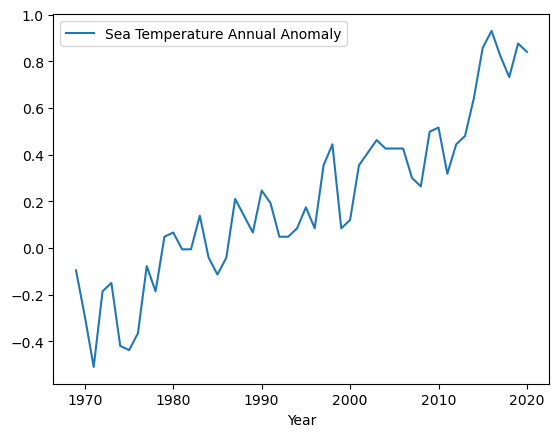

In [32]:
# Get a basic visual of the sea surface temperature anomalies
sea_temp_anomaly.plot()

In [33]:
# For better prediction use available data that dates back to 1880
# Load the dataset and change datatypes as needed

sea_surface_temps = pd.read_excel('seasurface_temps.xlsx', sheet_name = 'Sheet1')

In [34]:
sea_surface_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            141 non-null    int64  
 1   Annual anomaly  141 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB


In [35]:
# Change Year to Date format
sea_surface_temps['Year'] = pd.to_datetime(sea_surface_temps['Year'], format = '%Y')
sea_surface_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Year            141 non-null    datetime64[ns]
 1   Annual anomaly  141 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 KB


In [36]:
sea_surface_temps = sea_surface_temps.set_index('Year')
sea_surface_temps.head(5)

,Annual anomaly
Year,
1880-01-01,-0.420
1881-01-01,-0.330
1882-01-01,-0.348
1883-01-01,-0.456
1884-01-01,-0.582


<Axes: xlabel='Year'>

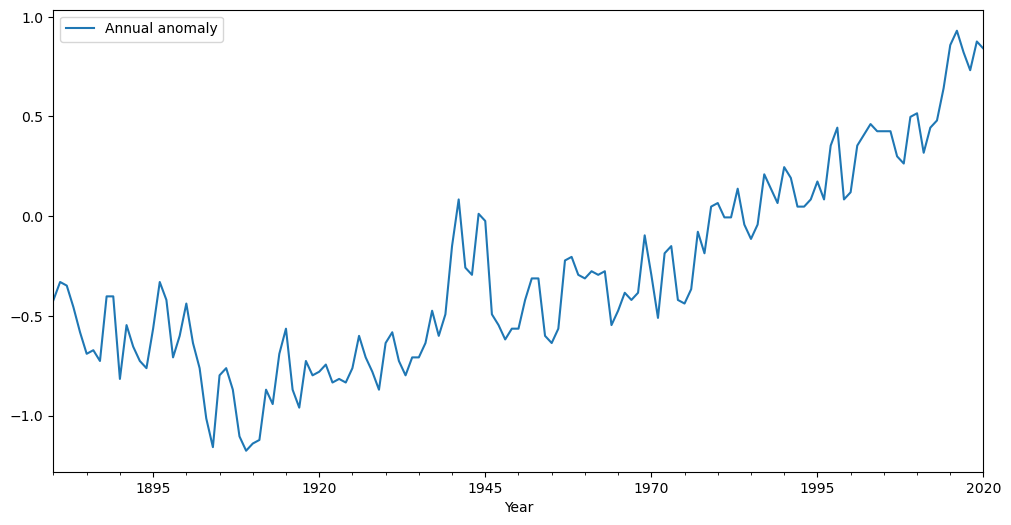

In [37]:
 
sea_surface_temps.plot(figsize = (12, 6))

In [38]:
# Checking the frequency of the time series data
sea_surface_temps.index

DatetimeIndex(['1880-01-01', '1881-01-01', '1882-01-01', '1883-01-01',
               '1884-01-01', '1885-01-01', '1886-01-01', '1887-01-01',
               '1888-01-01', '1889-01-01',
               ...
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Year', length=141, freq=None)

In [39]:
sea_surface_temps

,Annual anomaly
Year,
1880-01-01,-0.420
1881-01-01,-0.330
1882-01-01,-0.348
1883-01-01,-0.456
1884-01-01,-0.582
...,...
2016-01-01,0.930
2017-01-01,0.822
2018-01-01,0.732


In [40]:
# Define our forecaster
forecaster = Prophet()
# forecaster = AutoARIMA(sp = 1, suppress_warnings = True)

In [41]:
# Setting up the data split
# Will predict 25 years into the future
horizon = 25

In [42]:
y_train = sea_surface_temps[:-horizon] # All but the last 25 observations 
y_test = sea_surface_temps.tail(horizon) # Only the last 25 observations
 

In [43]:
forecaster.fit(y_train)

22:20:14 - cmdstanpy - INFO - Chain [1] start processing
22:20:14 - cmdstanpy - INFO - Chain [1] done processing


Prophet()

In [44]:
fh = ForecastingHorizon(y_test.index, is_relative = False)
fh

ForecastingHorizon(['1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None, is_relative=False)

In [45]:
y_pred = forecaster.predict(fh)
y_pred

,Annual anomaly
1996-01-01,-0.062309
1997-01-01,0.138920
1998-01-01,0.084426
1999-01-01,0.030338
2000-01-01,-0.023269
2001-01-01,0.177960
2002-01-01,0.123467
2003-01-01,0.069378
2004-01-01,0.015771
2005-01-01,0.217000


In [46]:
# Create the confidence interval
ci = forecaster.predict_interval(fh, coverage = 0.90) # 90 percent confidence interval
ci

Annual anomaly          
                      0.9          
                    lower     upper
1996-01-01      -0.399206  0.248344
1997-01-01      -0.185991  0.463434
1998-01-01      -0.238776  0.400550
1999-01-01      -0.294087  0.387761
2000-01-01      -0.325972  0.296212
2001-01-01      -0.132548  0.500288
2002-01-01      -0.198815  0.434279
2003-01-01      -0.256508  0.389465
2004-01-01      -0.303011  0.356021
2005-01-01      -0.108564  0.519586
2006-01-01      -0.158808  0.482726
2007-01-01      -0.231893  0.438479
2008-01-01      -0.292447  0.371562
2009-01-01      -0.048257  0.589162
2010-01-01      -0.097087  0.522859
2011-01-01      -0.168997  0.470171
2012-01-01      -0.214459  0.413366
2013-01-01      -0.042392  0.603138
2014-01-01      -0.078368  0.578384
2015-01-01      -0.138315  0.504611
2016-01-01      -0.200045  0.453692
2017-01-01       0.003120  0.657933
2018-01-01      -0.047125  0.600125
2019-01-01      -0.087460  0.540695
2020-01-01      -0.148591  0.486228

In [47]:
# The actual true values for the last 25 observations 
# Used to find mean absolute error and visualize the true values with predicted values
y_true = sea_surface_temps.tail(horizon)
y_true

,Annual anomaly
Year,
1996-01-01,0.084
1997-01-01,0.354
1998-01-01,0.444
1999-01-01,0.084
2000-01-01,0.120
2001-01-01,0.354
2002-01-01,0.408
2003-01-01,0.462
2004-01-01,0.426


In [48]:
mae = mean_absolute_error(y_true, y_pred)
mae

0.33781636399230325

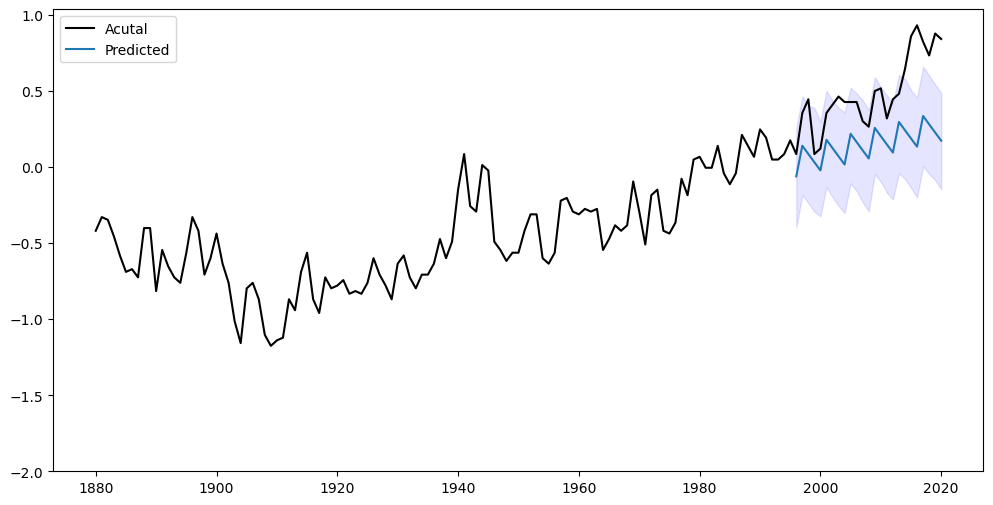

In [49]:
plt.figure(figsize = (12, 6))
plt.plot(sea_surface_temps.tail(horizon * 6),
        label = 'Acutal',color = 'black'
)
plt.gca().fill_between(ci.index, (ci.iloc[:,0]), (ci.iloc[:,1]), color ='b', alpha = 0.1)
plt.plot(y_pred, label = 'Predicted')
plt.ylim(bottom = 0)
plt.legend()
plt.ylim(-2)
plt.show()
plt.show()

In [50]:
# Predict future sea temperature anomaly values 25 years into the future
# Predict into the future
forecaster = Prophet()
# forecaster = AutoARIMA(sp= 1, supress_warnings = True)
forecaster.fit(sea_surface_temps)

last_date = sea_surface_temps.index.max()
fh = ForecastingHorizon(
    pd.date_range(str(last_date), periods = horizon, freq = 'YS'), # YS to align with the start of the year not the end
    is_relative = False)

22:20:15 - cmdstanpy - INFO - Chain [1] start processing
22:20:15 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
last_date

Timestamp('2020-01-01 00:00:00')

In [52]:
fh

ForecastingHorizon(['2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01',
               '2024-01-01', '2025-01-01', '2026-01-01', '2027-01-01',
               '2028-01-01', '2029-01-01', '2030-01-01', '2031-01-01',
               '2032-01-01', '2033-01-01', '2034-01-01', '2035-01-01',
               '2036-01-01', '2037-01-01', '2038-01-01', '2039-01-01',
               '2040-01-01', '2041-01-01', '2042-01-01', '2043-01-01',
               '2044-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN', is_relative=False)

In [53]:
y_pred = forecaster.predict(fh)
ci = forecaster.predict_interval(fh, coverage = 0.90).astype('float') 
ci

Annual anomaly          
                      0.9          
                    lower     upper
2020-01-01       0.112186  0.787501
2021-01-01       0.373381  1.028781
2022-01-01       0.320146  0.942797
2023-01-01       0.252068  0.923779
2024-01-01       0.196989  0.864370
2025-01-01       0.458222  1.101232
2026-01-01       0.365368  1.035297
2027-01-01       0.316874  0.956490
2028-01-01       0.284041  0.924113
2029-01-01       0.493527  1.143638
2030-01-01       0.423727  1.077466
2031-01-01       0.358201  1.030882
2032-01-01       0.319848  0.964721
2033-01-01       0.535728  1.180073
2034-01-01       0.494146  1.137660
2035-01-01       0.440712  1.072019
2036-01-01       0.360474  1.012479
2037-01-01       0.592036  1.267266
2038-01-01       0.536528  1.186830
2039-01-01       0.483793  1.149720
2040-01-01       0.422905  1.071411
2041-01-01       0.667236  1.312407
2042-01-01       0.599491  1.258224
2043-01-01       0.559926  1.226282
2044-01-01       0.471163  1.158103

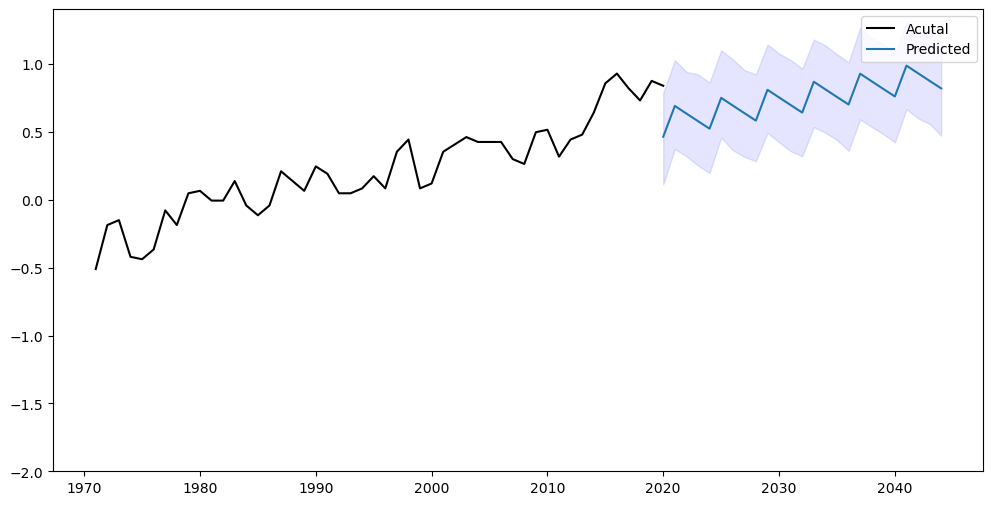

In [54]:
plt.figure(figsize = (12, 6))
plt.plot(sea_surface_temps.tail(horizon * 2),
        label = 'Acutal',color = 'black'
)
plt.gca().fill_between(ci.index, (ci.iloc[:,0]), (ci.iloc[:,1]), color ='b', alpha = 0.1)
plt.plot(y_pred, label = 'Predicted')

    
plt.ylim(bottom = -2)
plt.legend()
plt.show()
plt.show()

In [55]:
y_pred

,Annual anomaly
2020-01-01,0.464643
2021-01-01,0.691650
2022-01-01,0.635266
2023-01-01,0.579353
2024-01-01,0.523996
2025-01-01,0.751004
2026-01-01,0.694620
2027-01-01,0.638707
2028-01-01,0.583350
2029-01-01,0.810357


In [56]:
sea_surface_temps2 = pd.read_excel('seasurface_temps.xlsx', sheet_name = 'Sheet1')

<Axes: >

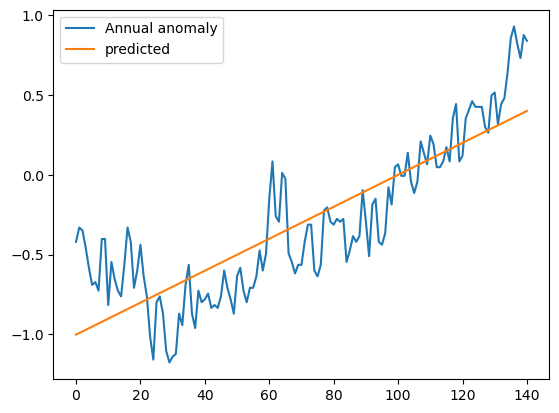

In [57]:
# Try a more simple approach. The above method may prove more useful for predidicting snowfall and depth values
# Fit coefficents.

 

coef = np.polyfit(sea_surface_temps2['Year'], sea_surface_temps2['Annual anomaly'], 1)

# Generate predictions for entire series.

sea_surface_temps2['predicted'] = pd.Series(np.polyval(coef, sea_surface_temps2['Year']))

sea_surface_temps2[['Annual anomaly', 'predicted']].plot()

In [58]:
x = 2025

print('Predicted Sea Surface Temperature Anomaly {}: {:.2f} degrees'.format(x, np.polyval(coef, x)))

Predicted Sea Surface Temperature Anomaly 2025: 0.45 degrees


* Trying a third approach by finding out the percent change from year to year in the annual surface sea temperature anomaly.

In [59]:
enso_v2[['Year', 'Sea Temperature Annual Anomaly']].head()

,Year,Sea Temperature Annual Anomaly
0,1969,-0.096
1,1970,-0.294
2,1971,-0.510
3,1972,-0.186
4,1973,-0.150


## Key note: 
* Sea Temperature Annual Anomaly is at index -10 column wise for enso_v2 DataFrame

* Open to suggestions as to how to better code this section.
* Manually find the percent differences from 2015 up to 2020 and then use the median percentage value to fill in the nulls 


# Make sure to be using enso_v2

In [60]:
enso_v2[['Year', 'Sea Temperature Annual Anomaly']].tail(9)

,Year,Sea Temperature Annual Anomaly
46,2015,0.858
47,2016,0.930
48,2017,0.822
49,2018,0.732
50,2019,0.876
51,2020,0.840
52,2021,NaN
53,2022,NaN
54,2023,NaN


In [61]:
# 1. Subtract the old value from the new value
# 2. Divide the difference by the old value
# Multiply by 100

percent_change_2015_to_2016 = round((0.930 - 0.858) / 0.858 * 100,2)
print(percent_change_2015_to_2016)

percent_change_2016_to_2017 = round((0.822 - 0.930) / 0.930 * 100, 2)
print(percent_change_2016_to_2017)

percent_change_2017_to_2018 = round((0.732 - 0.822) / 0.822 * 100, 2)
print(percent_change_2017_to_2018)

percent_change_2018_to_2019 = round((0.876 - 0.732) / 0.732 * 100, 2)
print(percent_change_2018_to_2019)

percent_change_2019_to_2020 = round((0.840 - 0.876) / 0.876 * 100, 2)
print(percent_change_2019_to_2020)

8.39
-11.61
-10.95
19.67
-4.11


In [62]:
percent_changes = np.array([8.39, -11.61, -10.95, 19.67, -4.11])

In [63]:
percent_changes

array([  8.39, -11.61, -10.95,  19.67,  -4.11])

In [64]:
percent_change_median = np.median(percent_changes)
percent_change_median

-4.11

* Percent change of -4.11% will be subtracted from the last known value in the Sea Temperature Annual Anomaly column

In [65]:
print(round(0.840 - (.840 * 0.0411 ),3)) # Value for 2021 
print(round(0.805 - (0.805 * 0.0411), 3))# Value for 2022
print(round(0.772 - (0.772 * 0.0411), 3))# value for 2023

0.805
0.772
0.74


In [66]:
enso_v2[['Year', 'Sea Temperature Annual Anomaly']].tail(3)

,Year,Sea Temperature Annual Anomaly
52,2021,NaN
53,2022,NaN
54,2023,NaN


In [67]:
# Replace the null values with the values calculated above
enso_v2.iloc[52, -10] = 0.805 
enso_v2.iloc[53, -10] = 0.772 
enso_v2.iloc[54, -10] = 0.74

In [68]:
enso_v2[['Year', 'Sea Temperature Annual Anomaly']].tail(3)

,Year,Sea Temperature Annual Anomaly
52,2021,0.805
53,2022,0.772
54,2023,0.740


In [69]:
enso_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            55 non-null     int32  
 1   Baker Snowfall                  53 non-null     float64
 2   Paradise Snowfall               54 non-null     float64
 3   Hyak Snowfall                   51 non-null     float64
 4   Crystal Mountain Snow Depth     54 non-null     float64
 5   Mission Ridge Snow Depth        47 non-null     float64
 6   Mt Baker Ski Area Snow Depth    52 non-null     float64
 7   Paradise Snow Depth             54 non-null     float64
 8   Snoqualmie Pass Snow Depth      53 non-null     float64
 9   Stampede Pass Snow Depth        52 non-null     float64
 10  Stevens Pass Snow Depth         54 non-null     float64
 11  DJF                             55 non-null     float64
 12  JFM                             55 non

* Ivestigate the snow fall and depth columns to check for outliers 
* This will determine whether to fill null values with the mean or median value for each column

<Axes: xlabel='Year', ylabel='Baker Snowfall'>

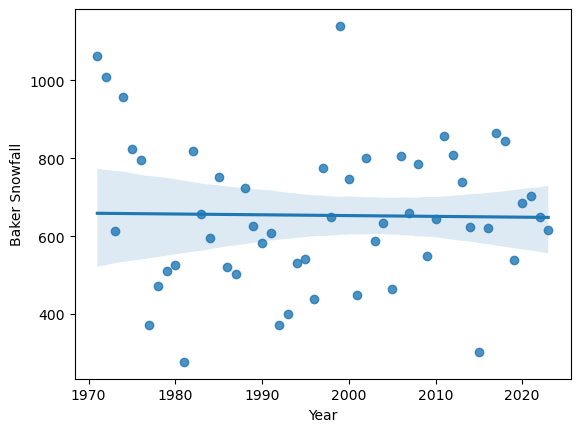

In [70]:
sns.regplot(data = enso_v2, x = 'Year', y = 'Baker Snowfall')

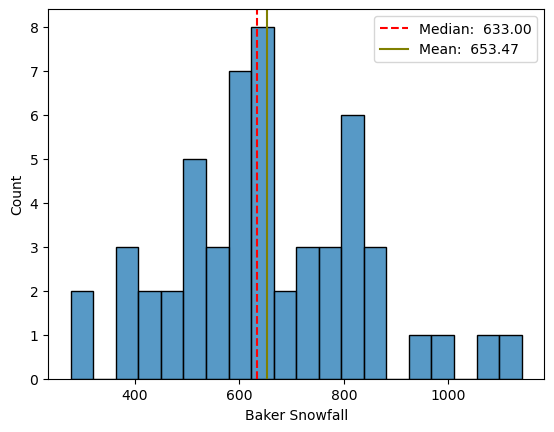

In [84]:
sns.histplot(enso_v2['Baker Snowfall'], bins = 20)

baker_snowfall_median = enso_v2['Baker Snowfall'].median()
baker_snowfall_mean = enso_v2['Baker Snowfall'].mean()

# Compare median and mean values 
plt.axvline(baker_snowfall_median, color = 'red', linestyle = '--', label = f'Median: {baker_snowfall_median: .2f}')
plt.axvline(baker_snowfall_mean, color = 'olive', linestyle = '-', label = f'Mean: {baker_snowfall_mean: .2f}')
plt.legend()
plt.show()

<Axes: xlabel='Year', ylabel='Snoqualmie Pass Snow Depth'>

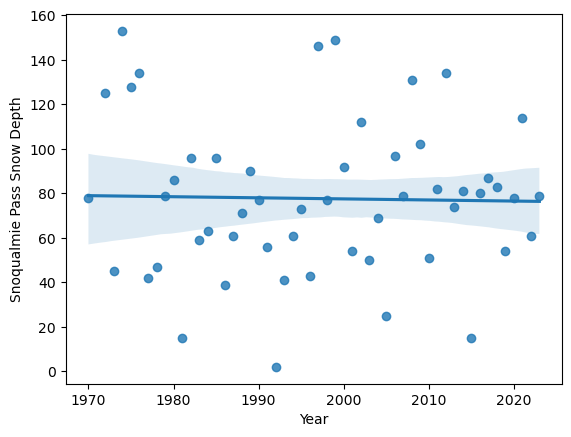

In [70]:
sns.regplot(data = enso_v2, x = 'Year', y = 'Snoqualmie Pass Snow Depth')

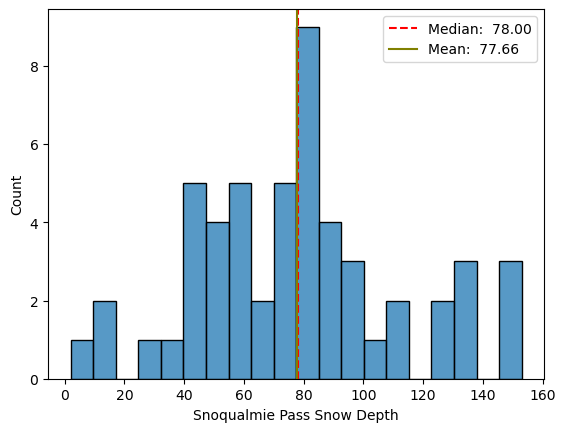

In [85]:
sns.histplot(enso_v2['Snoqualmie Pass Snow Depth'], bins = 20)

snoqualmie_pass_depth_median = enso_v2['Snoqualmie Pass Snow Depth'].median()
snoqualmie_pass_depth_mean = enso_v2['Snoqualmie Pass Snow Depth'].mean()

# Compare median and mean values 

plt.axvline(snoqualmie_pass_depth_median, color = 'red', linestyle = '--', label = f'Median: {snoqualmie_pass_depth_median: .2f}')
plt.axvline(snoqualmie_pass_depth_mean, color = 'olive', linestyle = '-', label = f'Mean: {snoqualmie_pass_depth_mean: .2f}')
plt.legend()

plt.show()

<Axes: xlabel='Year', ylabel='Mission Ridge Snow Depth'>

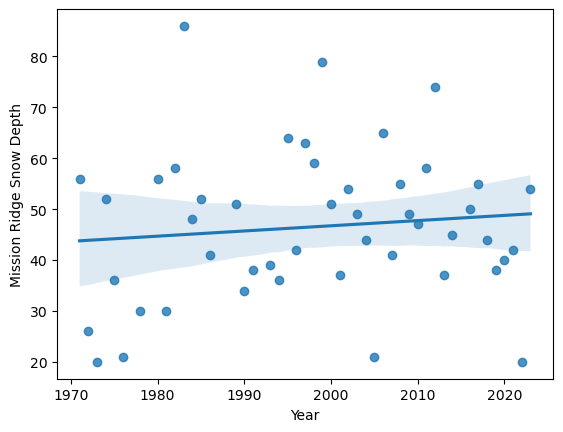

In [73]:
sns.regplot(data = enso_v2, x = 'Year', y = 'Mission Ridge Snow Depth')

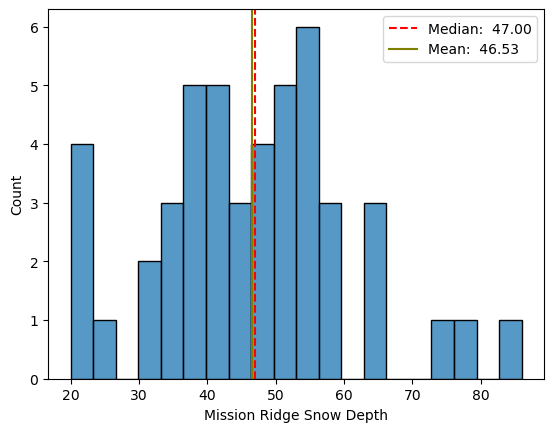

In [86]:
sns.histplot(enso_v2['Mission Ridge Snow Depth'], bins = 20)

mission_ridge_median = enso_v2['Mission Ridge Snow Depth'].median()
mission_ridge_mean = enso_v2['Mission Ridge Snow Depth'].mean()

# Compare median and mean values 
plt.axvline(mission_ridge_median, color = 'red', linestyle = '--', label = f'Median: {mission_ridge_median: .2f}')
plt.axvline(mission_ridge_mean, color = 'olive', linestyle = '-', label = f'Mean: {mission_ridge_mean: .2f}')

plt.legend()

plt.show()

<Axes: xlabel='Year', ylabel='Stevens Pass Snow Depth'>

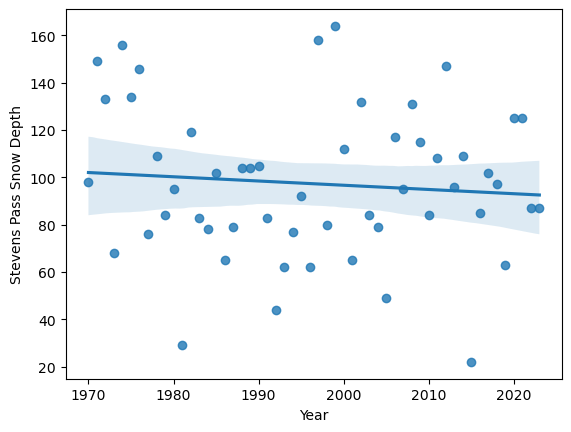

In [75]:
sns.regplot(data = enso_v2, x = 'Year', y = 'Stevens Pass Snow Depth')

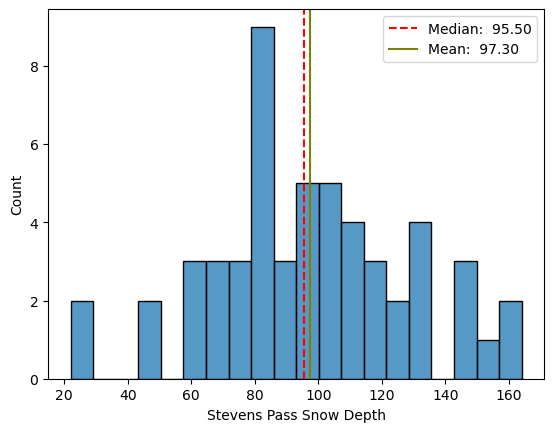

In [81]:
sns.histplot(enso_v2['Stevens Pass Snow Depth'], bins = 20)

stevens_pass_median_value = enso_v2['Stevens Pass Snow Depth'].median()
stevens_pass_mean_value = enso_v2['Stevens Pass Snow Depth'].mean()

# Compare median and mean values 
plt.axvline(stevens_pass_median_value, color = 'red', linestyle = '--', label = f'Median: {stevens_pass_median_value: .2f}')
plt.axvline(stevens_pass_mean_value, color = 'olive', linestyle = '-', label = f'Mean: {stevens_pass_mean_value: .2f}')
plt.legend()

plt.show()

* Create a Decade column and will group by decade to find the median values.
* Reasoning for using median versus mean is due to there being an significant snow year in 1999 which will skew the data some
* To maintain consistency accross all decades will use the median values. 

In [87]:
# Create a decade column
enso_v2['Decade'] = enso_v2['Year'].apply(lambda x: '1970s' if x < 1980 else 
                      ('1980s' if x < 1990 else ('1990s' if x < 2000 else 
                                                 ('2000s' if x < 2010 else ('2010s' if x < 2020 else 
                                                                            ('2020s' if x < 2030 else x)))))) 

In [88]:
enso_v2[['Year', 'Decade']].sample(5)

,Year,Decade
23,1992,1990s
49,2018,2010s
5,1974,1970s
18,1987,1980s
38,2007,2000s


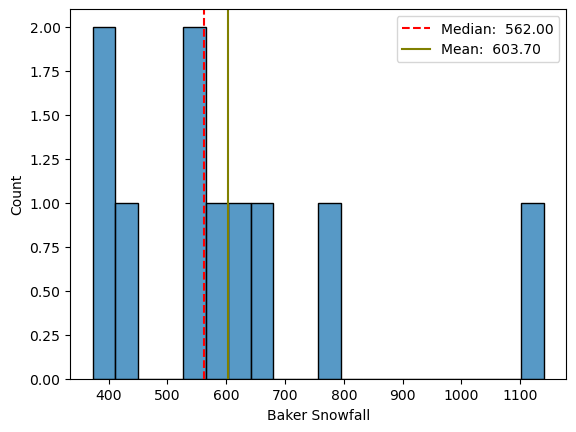

In [107]:
# Compare mean and median for Mt. Baker snowfall and snow depths for Stevens Pass and Mission Ridge from 1990 through 2019
# Mt. Baker snowfall 90s
baker_snowfall_90s_data = enso_v2[(enso_v2['Baker Snowfall'].notnull()) & (enso_v2['Decade'] == '1990s')]

sns.histplot(baker_snowfall_90s_data['Baker Snowfall'], bins = 20)

baker_snowfall_90s_median = baker_snowfall_90s_data['Baker Snowfall'].median()
baker_snowfall_90s_mean = baker_snowfall_90s_data['Baker Snowfall'].mean()

plt.axvline(baker_snowfall_90s_median, color = 'red', linestyle = '--', label = f'Median: {baker_snowfall_90s_median: .2f}')
plt.axvline(baker_snowfall_90s_mean, color = 'olive', linestyle = '-', label = f'Mean: {baker_snowfall_90s_mean: .2f}')

plt.legend()
plt.show()
 

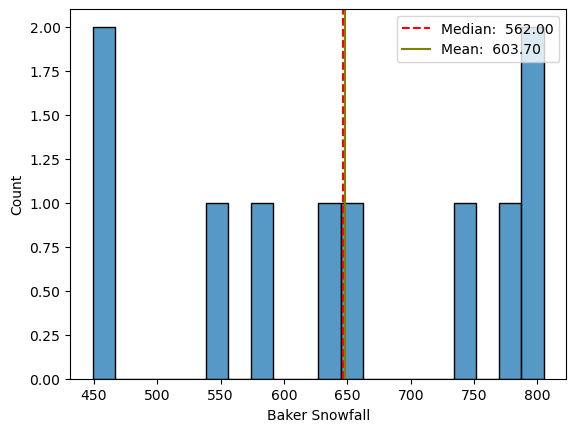

In [108]:
# Mt. Baker snowfall 2000s
baker_snowfall_2000s_data = enso_v2[(enso_v2['Baker Snowfall'].notnull()) & (enso_v2['Decade'] == '2000s')]

sns.histplot(baker_snowfall_2000s_data['Baker Snowfall'], bins = 20)

baker_snowfall_2000s_median = baker_snowfall_2000s_data['Baker Snowfall'].median()
baker_snowfall_2000s_mean = baker_snowfall_2000s_data['Baker Snowfall'].mean()

plt.axvline(baker_snowfall_2000s_median, color = 'red', linestyle = '--', label = f'Median: {baker_snowfall_90s_median: .2f}')
plt.axvline(baker_snowfall_2000s_mean, color = 'olive', linestyle = '-', label = f'Mean: {baker_snowfall_90s_mean: .2f}')

plt.legend()
plt.show()
 

In [ ]:
# Create a function so that there is less rewritten code and can compare more areas along with years 
# Reasoning: Determine whether null values are better filled in with mean or median values

In [114]:
def histplot_plotter(data, column_1, column_2, column_2_choice):
    """The function will return a histogram depicting the frequency of snowfall or snow depth amounts.
    The chart will also consist of a median and mean axis line for comparing mean and median values.
    This will enable to visualize if the data is right-skewed (mean is more than the median) or left-skewed (mean is less
    than the median).
    
    Parameters:
        data (DataFrame): The DataFrame that is selected
        column_1 (str): The first column to filter the DataFrame 
        column_2 (str): The second column to filter the DataFrame
        column_2_choice (str): The selected value from the second column chosen
    
    Returns:
        Returns a basic histogram with a median and mean vertical axis line
    """
    
    
    result = data[(data[column_1].notnull()) & (data[column_2] == column_2_choice)]
    sns.histplot(result[column_1], bins = 20)
    
    result_median = result[column_1].median()
    result_mean = result[column_1].mean()
    
    plt.axvline(result_median, color = 'red', linestyle = '--', label = f'Median: {result_median: .2f}')
    plt.axvline(result_mean, color = 'olive', linestyle = '-', label = f'Mean: {result_mean: .2f}')
    
    plt.legend()
    plt.show()

 

### Baker Snowfall 

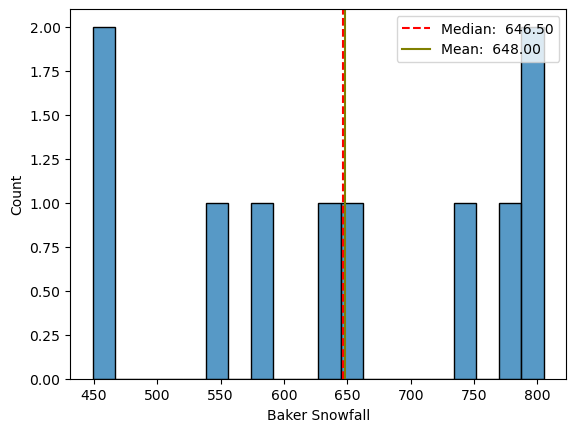

In [115]:
# Baker Snowfall 2000s
histplot_plotter(enso_v2, 'Baker Snowfall', 'Decade', '2000s')

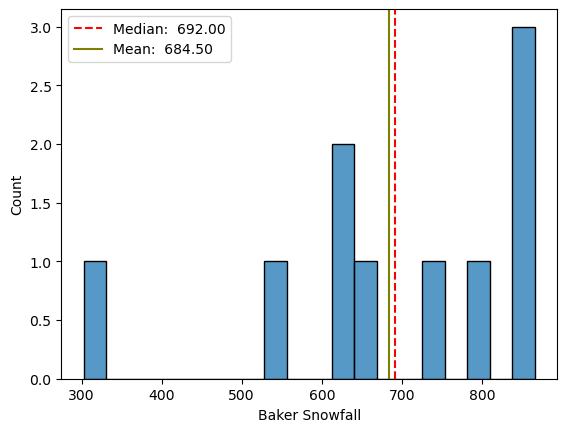

In [116]:
# Baker snowfall 2010s
histplot_plotter(enso_v2, 'Baker Snowfall', 'Decade', '2010s')

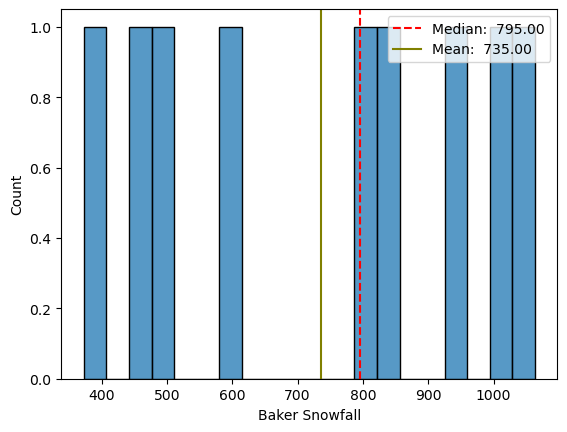

In [117]:
# Baker snowfall 1970s
histplot_plotter(enso_v2, 'Baker Snowfall', 'Decade', '1970s')

###  Stevens Pass Snow Depth

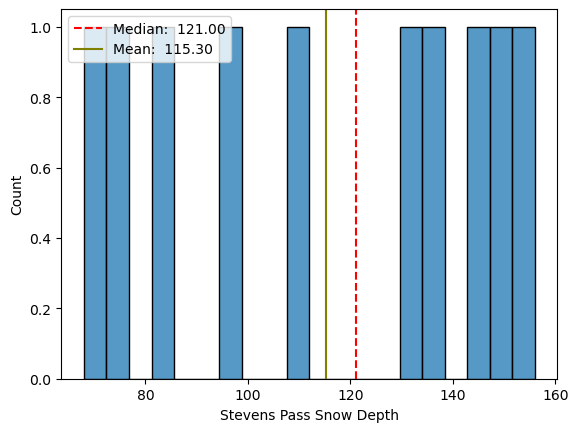

In [118]:
# Stevens Pass snow depth 1970s
histplot_plotter(enso_v2, 'Stevens Pass Snow Depth', 'Decade', '1970s')

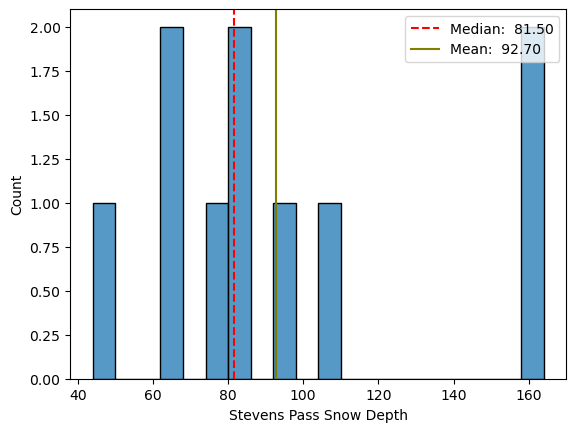

In [119]:
# Stevens Pass snow depth 1990s
histplot_plotter(enso_v2, 'Stevens Pass Snow Depth', 'Decade', '1990s')

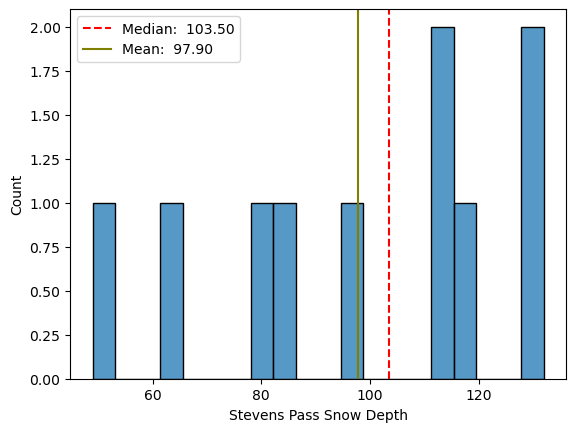

In [120]:
# Stevens Pass snow depth 2000s
histplot_plotter(enso_v2, 'Stevens Pass Snow Depth', 'Decade', '2000s')

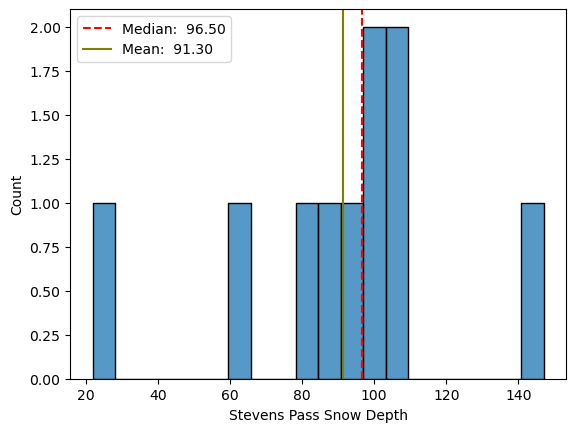

In [121]:
# Stevens Pass snow depth 2010s
histplot_plotter(enso_v2, 'Stevens Pass Snow Depth', 'Decade', '2010s')

### Mission Ridge Snow Depth

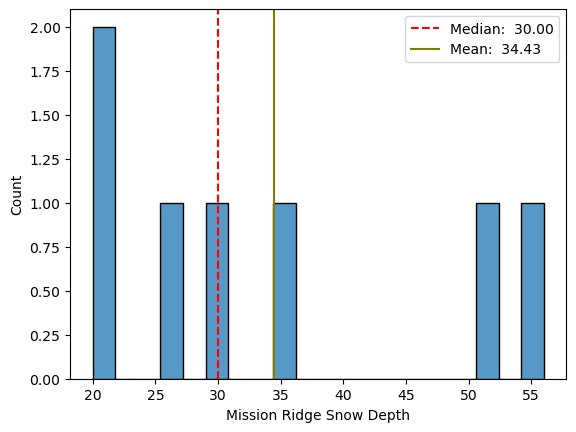

In [122]:
# Mission Ridge snow depth 1970s
histplot_plotter(enso_v2, 'Mission Ridge Snow Depth', 'Decade', '1970s')

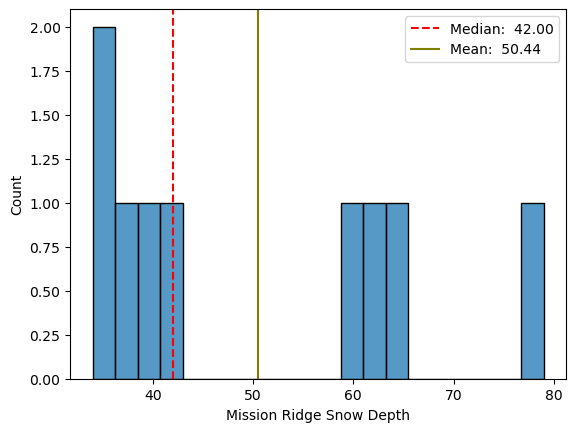

In [123]:
# Mission Ridge snow depth 1990s
histplot_plotter(enso_v2, 'Mission Ridge Snow Depth', 'Decade', '1990s')

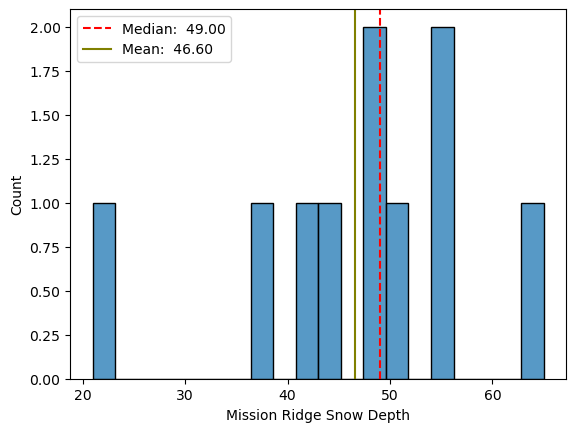

In [124]:
# Mission Ridge Snow Depth 2000s
histplot_plotter(enso_v2, 'Mission Ridge Snow Depth', 'Decade', '2000s')

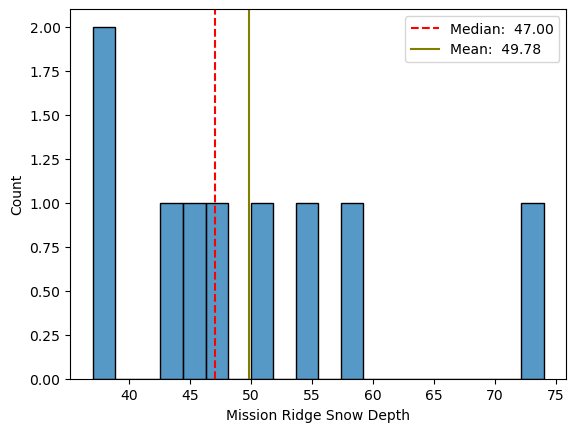

In [126]:
# Mission Ridge snow depth 2010s
histplot_plotter(enso_v2, 'Mission Ridge Snow Depth', 'Decade', '2010s')

### Snoqualmie Pass Snow Depth

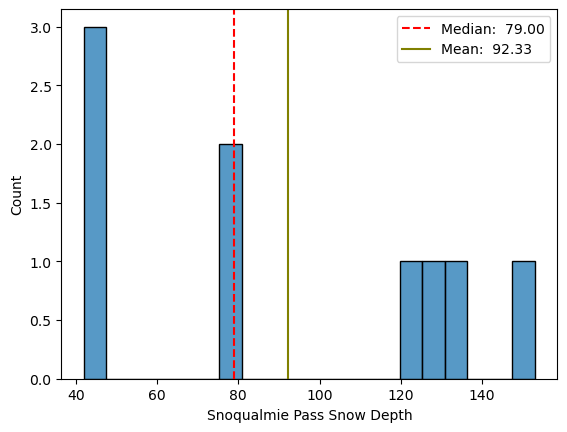

In [127]:
# Snoqualmie Pass snow depth 1970s
histplot_plotter(enso_v2, 'Snoqualmie Pass Snow Depth', 'Decade', '1970s')

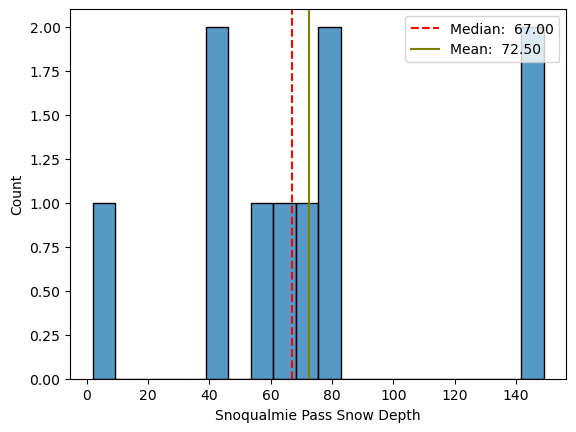

In [128]:
# Snoqualmie Pass snow depth 1990s
histplot_plotter(enso_v2, 'Snoqualmie Pass Snow Depth', 'Decade', '1990s')

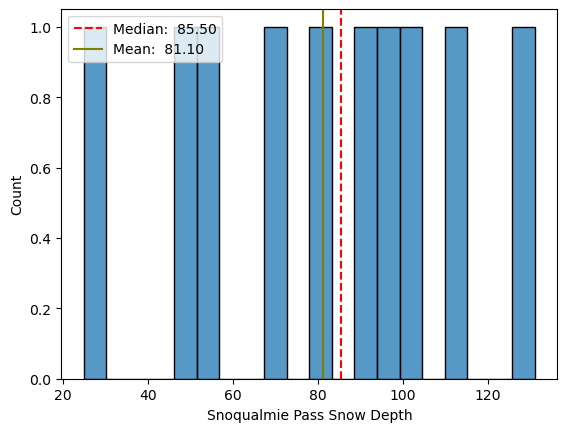

In [129]:
# Snoqualmie Pass snow depth 2000s
histplot_plotter(enso_v2, 'Snoqualmie Pass Snow Depth', 'Decade', '2000s')

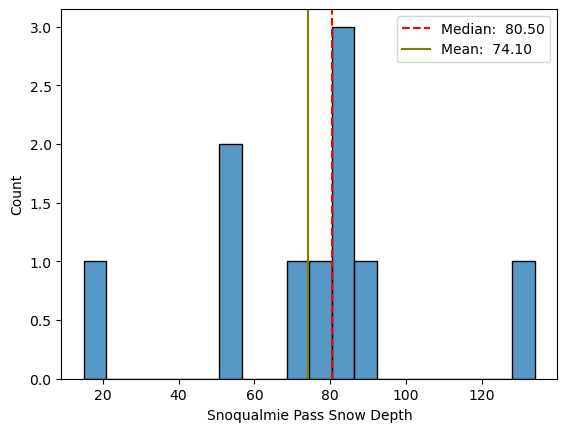

In [130]:
# Snoqualmie Pass snow depth 2010s
histplot_plotter(enso_v2, 'Snoqualmie Pass Snow Depth', 'Decade', '2010s')

* When determining whether to use mean or the median to fill in null values for each area given the snowfall or depth for each decade, median will be used.
* When plotting the histograms for select areas and decades, there is some evidence of the data being left or right skewed as noted by the median and mean lines on each chart. 
* Outliers can have a major impact on the mean. 
* Although some areas and or decades have snowfall medians and mean values nearly identical, for consistency will use the median value.

In [74]:
# Proceed to group the snowfall and depth amounts for each decade across all areas to fill in null values
enso_v2.groupby(['Decade'])[['Baker Snowfall', 'Paradise Snowfall', 'Hyak Snowfall', 'Crystal Mountain Snow Depth', 
                            'Mission Ridge Snow Depth', 'Mt Baker Ski Area Snow Depth', 'Paradise Snow Depth', 
                            'Snoqualmie Pass Snow Depth', 'Stampede Pass Snow Depth', 'Stevens Pass Snow Depth']].median()

,Baker Snowfall,Paradise Snowfall,Hyak Snowfall,Crystal Mountain Snow Depth,Mission Ridge Snow Depth,Mt Baker Ski Area Snow Depth,Paradise Snow Depth,Snoqualmie Pass Snow Depth,Stampede Pass Snow Depth,Stevens Pass Snow Depth
Decade,,,,,,,,,,
1970s,795.0,734.5,437.5,74.0,30.0,172.5,181.0,79.0,119.0,121.0
1980s,611.0,663.0,347.5,61.5,51.5,172.0,172.0,67.0,89.5,89.0
1990s,562.0,698.5,367.0,64.0,42.0,160.0,155.0,67.0,65.0,81.5
2000s,646.5,704.0,368.5,86.0,49.0,175.5,177.0,85.5,94.5,103.5
2010s,692.0,698.0,327.0,71.0,47.0,173.5,169.0,80.5,80.0,96.5
2020s,667.0,648.0,256.0,74.0,41.0,176.5,188.5,78.5,88.0,106.0


In [75]:
enso_v2[enso_v2['Decade'] == '1970s']['Baker Snowfall'].fillna(795.0)

0      795.0
1      795.0
2     1063.0
3     1008.0
4      612.0
5      958.0
6      825.0
7      795.0
8      373.0
9      471.0
10     510.0
Name: Baker Snowfall, dtype: float64

In [76]:
enso_v2.loc[enso_v2['Decade'] == '1970s', 'Baker Snowfall'] = enso_v2.loc[enso_v2['Decade'] == '1970s', 
                                                                          'Baker Snowfall'].fillna(795.0)

In [77]:
# To avoid unnecessary code, check through each snowfall and depth columns to see where the null values are.
# Not all decades for each area's snowfall or depth amounts will have null values. 
# Drop the first row since the Year 1969 will not be needed in the analysis. 
enso_v2.drop(enso_v2.index[0], inplace = True)
enso_v2.head(3)


,Year,Baker Snowfall,Paradise Snowfall,Hyak Snowfall,Crystal Mountain Snow Depth,Mission Ridge Snow Depth,Mt Baker Ski Area Snow Depth,Paradise Snow Depth,Snoqualmie Pass Snow Depth,Stampede Pass Snow Depth,...,Named Storms (Prior Year),Named Storm Days,Hurricanes,Hurricane Days,Major Hurricanes,Major Hurricane Days,Accumulated Cyclone Energy,OND_NDJ,Winter/Spring ENSO,Decade
1,1970,795.0,649.0,383.0,63.0,NaN,NaN,135.0,78.0,116.0,...,18,92.25,12,40.25,5,6.5,165.7,1.4,0.45,1970s
2,1971,1063.0,884.0,492.0,111.0,56.0,268.0,271.0,NaN,171.0,...,10,30.25,5,6.75,2,1.0,40.2,-2.0,-1.12,1970s
3,1972,1008.0,1122.0,600.0,89.0,26.0,204.0,268.0,125.0,140.0,...,13,63.00,6,28.75,1,1.0,96.8,-1.9,-0.42,1970s


In [78]:
# Check the Paradise Snowfall Column
enso_v2['Paradise Snowfall'].isnull().sum()

0

In [79]:
# Hyak Snowfall column
print(enso_v2['Hyak Snowfall'].isnull().sum())
enso_v2[['Year','Hyak Snowfall']].tail(3) 



3


,Year,Hyak Snowfall
52,2021,NaN
53,2022,NaN
54,2023,NaN


In [80]:
enso_v2.loc[enso_v2['Decade'] == '2020s', 'Hyak Snowfall'] = enso_v2.loc[enso_v2['Decade'] == '2020s', 
                                                                          'Hyak Snowfall'].fillna(256.0) 
enso_v2[['Year','Hyak Snowfall']].tail(3) 

,Year,Hyak Snowfall
52,2021,256.0
53,2022,256.0
54,2023,256.0


In [82]:
# Crystal Mountain Snow Depth
print(enso_v2['Crystal Mountain Snow Depth'].isnull().sum()) 

0


In [87]:
# Mission Ridge snow depth
# enso_v2[['Year','Mission Ridge Snow Depth']] 
# 1970s, 1980s, 1990s, and 2010s have nulls
enso_v2.loc[enso_v2['Decade'] == '1970s', 'Mission Ridge Snow Depth'] = enso_v2.loc[enso_v2['Decade'] == '1970s', 
                                                                          'Mission Ridge Snow Depth'].fillna(30.0)

enso_v2.loc[enso_v2['Decade'] == '1980s', 'Mission Ridge Snow Depth'] = enso_v2.loc[enso_v2['Decade'] == '1980s', 
                                                                          'Mission Ridge Snow Depth'].fillna(51.5)

enso_v2.loc[enso_v2['Decade'] == '1990s', 'Mission Ridge Snow Depth'] = enso_v2.loc[enso_v2['Decade'] == '1990s', 
                                                                          'Mission Ridge Snow Depth'].fillna(42.0)

enso_v2.loc[enso_v2['Decade'] == '2010s', 'Mission Ridge Snow Depth'] = enso_v2.loc[enso_v2['Decade'] == '2010s', 
                                                                          'Mission Ridge Snow Depth'].fillna(47.0)



In [92]:
print(enso_v2['Mt Baker Ski Area Snow Depth'].isnull().sum())

# enso_v2[['Year', 'Mt Baker Ski Area Snow Depth']] 
# Only the 1970s has nulls in this column

enso_v2.loc[enso_v2['Decade'] == '1970s', 'Mt Baker Ski Area Snow Depth'] = enso_v2.loc[enso_v2['Decade'] == '1970s', 
                                                                          'Mt Baker Ski Area Snow Depth'].fillna(172.5) 

2


In [96]:
# Snoqualmie Pass snow depth
print(enso_v2['Snoqualmie Pass Snow Depth'].isnull().sum())
# enso_v2[['Year', 'Snoqualmie Pass Snow Depth']]
# Decade with nulls is 1970s

enso_v2.loc[enso_v2['Decade'] == '1970s', 'Snoqualmie Pass Snow Depth'] = enso_v2.loc[enso_v2['Decade'] == '1970s', 
                                                                          'Snoqualmie Pass Snow Depth'].fillna(79.0)  

1


In [101]:
# Stampede Pass snow depth
print(enso_v2['Stampede Pass Snow Depth'].isnull().sum())

# enso_v2[['Year', 'Stampede Pass Snow Depth']]
# The two null values are in the 2010s range

enso_v2.loc[enso_v2['Decade'] == '2010s', 'Stampede Pass Snow Depth'] = enso_v2.loc[enso_v2['Decade'] == '2010s', 
                                                                          'Stampede Pass Snow Depth'].fillna(80.0) 

2


In [102]:
enso_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 1 to 54
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            54 non-null     int32  
 1   Baker Snowfall                  54 non-null     float64
 2   Paradise Snowfall               54 non-null     float64
 3   Hyak Snowfall                   54 non-null     float64
 4   Crystal Mountain Snow Depth     54 non-null     float64
 5   Mission Ridge Snow Depth        54 non-null     float64
 6   Mt Baker Ski Area Snow Depth    54 non-null     float64
 7   Paradise Snow Depth             54 non-null     float64
 8   Snoqualmie Pass Snow Depth      54 non-null     float64
 9   Stampede Pass Snow Depth        54 non-null     float64
 10  Stevens Pass Snow Depth         54 non-null     float64
 11  DJF                             54 non-null     float64
 12  JFM                             54 non

In [112]:
# Drop the Oceanic Niño Index (ONI) three-month running mean columns
enso_v2.drop(columns = ['DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ',
                         'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ'], inplace = True)

In [125]:
enso_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 1 to 54
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            54 non-null     int32  
 1   Baker Snowfall                  54 non-null     float64
 2   Paradise Snowfall               54 non-null     float64
 3   Hyak Snowfall                   54 non-null     float64
 4   Crystal Mountain Snow Depth     54 non-null     float64
 5   Mission Ridge Snow Depth        54 non-null     float64
 6   Mt Baker Ski Area Snow Depth    54 non-null     float64
 7   Paradise Snow Depth             54 non-null     float64
 8   Snoqualmie Pass Snow Depth      54 non-null     float64
 9   Stampede Pass Snow Depth        54 non-null     float64
 10  Stevens Pass Snow Depth         54 non-null     float64
 11  Sea Temperature Annual Anomaly  54 non-null     float64
 12  Named Storms (Prior Year)       54 non

In [115]:
# Check with el_nino_la_nina_years Excel file to make sure that the Winter/Spring ENSO and Year values match
# enso_v2[['Year', 'Winter/Spring ENSO']]

In [119]:
# Rename the Winter/Spring ENSO column to OND_MAM Mean
enso_v2.rename(columns = {'Winter/Spring ENSO':'OND_MAM Mean'}, inplace = True)

In [123]:
# enso_v2.info()

#### Create the Winter/Spring ENSO column
* -0.49 to 0.49: Neutral
* 0.5 to 0.99: Weak El Niño 
* 1.0 to 1.49: Moderate El Niño 
* 1.50 to 1.99: Strong El Niño 
* greater than or eqeual to 2.0: Very Strong El Niño 

* -0.5 to -0.99: Weak La Niña 
* -1.0 to -1.49: Moderate La Niña
* -1.5 to -1.99: Strong La Niña
* <= -2.00: Very Strong La Niña


In [140]:
enso_v2['Winter/Spring ENSO'] = enso_v2['OND_MAM Mean'].apply(lambda x: 'Neutral' if x > -0.5 and x < 0.5 
                              else ( 'Weak El Niño' if x >= 0.5 and x < 1.0 else (
                              'Moderate El Niño' if x >= 1.0 and x < 1.5 else (
                              'Strong El Niño' if x >= 1.5 and x < 2.0 else (
                              'Very Strong El Niño' if x >= 2.0 else (
                              'Weak La Niña' if x <= -0.5 and x > -1.0 else (
                              'Moderate La Niña' if x <= -1.0 and x > -1.5 else (
                              'Strong La Niña' if x <= -1.5 and x > -2.0 else (
                              'Very Strong La Niña' if x <= -2.0 else x)))))))))

In [141]:
# Check to see that OND_MAM Mean and Winter/Spring ENSO colunns have the correct category matching
enso_v2[['Year', 'OND_MAM Mean', 'Winter/Spring ENSO']]

,Year,OND_MAM Mean,Winter/Spring ENSO
1,1970,0.45,Neutral
2,1971,-1.12,Moderate La Niña
3,1972,-0.42,Neutral
4,1973,1.27,Moderate El Niño
5,1974,-1.58,Strong La Niña
6,1975,-0.65,Weak La Niña
7,1976,-1.22,Moderate La Niña
8,1977,0.58,Weak El Niño
9,1978,0.43,Neutral
10,1979,0.08,Neutral


In [142]:
enso_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 1 to 54
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            54 non-null     int32  
 1   Baker Snowfall                  54 non-null     float64
 2   Paradise Snowfall               54 non-null     float64
 3   Hyak Snowfall                   54 non-null     float64
 4   Crystal Mountain Snow Depth     54 non-null     float64
 5   Mission Ridge Snow Depth        54 non-null     float64
 6   Mt Baker Ski Area Snow Depth    54 non-null     float64
 7   Paradise Snow Depth             54 non-null     float64
 8   Snoqualmie Pass Snow Depth      54 non-null     float64
 9   Stampede Pass Snow Depth        54 non-null     float64
 10  Stevens Pass Snow Depth         54 non-null     float64
 11  Sea Temperature Annual Anomaly  54 non-null     float64
 12  Named Storms (Prior Year)       54 non

In [148]:
# Create an ENSO Category column that groups all El Niño, La Niña, and Neutral Years into three different categories
enso_v2['ENSO Category'] = enso_v2['Winter/Spring ENSO'].apply(lambda x: 'Neutral' if 'Neutral' in str(x) else 
                                    ('El Niño' if 'Niño' in str(x) else 
                                     ('La Niña' if 'Niña' in str(x) else x)))

In [149]:
enso_v2[['Winter/Spring ENSO', 'ENSO Category']]

,Winter/Spring ENSO,ENSO Category
1,Neutral,Neutral
2,Moderate La Niña,La Niña
3,Neutral,Neutral
4,Moderate El Niño,El Niño
5,Strong La Niña,La Niña
6,Weak La Niña,La Niña
7,Moderate La Niña,La Niña
8,Weak El Niño,El Niño
9,Neutral,Neutral
10,Neutral,Neutral


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 1 to 54
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            54 non-null     int32  
 1   Baker Snowfall                  54 non-null     float64
 2   Paradise Snowfall               54 non-null     float64
 3   Hyak Snowfall                   54 non-null     float64
 4   Crystal Mountain Snow Depth     54 non-null     float64
 5   Mission Ridge Snow Depth        54 non-null     float64
 6   Mt Baker Ski Area Snow Depth    54 non-null     float64
 7   Paradise Snow Depth             54 non-null     float64
 8   Snoqualmie Pass Snow Depth      54 non-null     float64
 9   Stampede Pass Snow Depth        54 non-null     float64
 10  Stevens Pass Snow Depth         54 non-null     float64
 11  Sea Temperature Annual Anomaly  54 non-null     float64
 12  Named Storms (Prior Year)       54 non

#### Create an Annual Anomaly Category column
* If the annual anomaly is > 0 and <= 0.250: Slightly Above Average
* If the annual anomaly is > 0.250 and <= 0.500: Moderately Above Average
* If the annual anomaly is > 0.500: Highly Above Average
* If the annual anomaly is < 0 and >= -0.250: Slightly Below Average
* If the annual anomaly is < -0.250 and >= -0.500: Moderately Below Average
* If the annual anomaly is < -0.500: Highly Below Average

In [154]:
# Find the minimum and maximum temperature annual anomaly
print(enso_v2['Sea Temperature Annual Anomaly'].min())
print(enso_v2['Sea Temperature Annual Anomaly'].max())

-0.51
0.93


In [158]:
enso_v2['Annual Anomaly Category'] = enso_v2['Sea Temperature Annual Anomaly'].apply(
    lambda x: 'Slightly Above Average' if x > 0 and x <= 0.250 else 
                                                ('Moderately Above Average' if x > 0.250 and x <= 0.500 else 
                                                 ('Highly Above Average' if x > 0.500 else 
                                                  ('Slightly Below Average' if x < 0 and x >= -0.250 else 
                                                   ('Moderately Below Average' if x < -0.250 and x >= -0.500 else 
                                                    ('Highly Below Average' if x < -0.500 else 'Average'))))))

In [159]:
enso_v2[['Year', 'Sea Temperature Annual Anomaly', 'Annual Anomaly Category']]

,Year,Sea Temperature Annual Anomaly,Annual Anomaly Category
1,1970,-0.294,Moderately Below Average
2,1971,-0.510,Highly Below Average
3,1972,-0.186,Slightly Below Average
4,1973,-0.150,Slightly Below Average
5,1974,-0.420,Moderately Below Average
6,1975,-0.438,Moderately Below Average
7,1976,-0.366,Moderately Below Average
8,1977,-0.078,Slightly Below Average
9,1978,-0.186,Slightly Below Average
10,1979,0.048,Slightly Above Average


In [161]:
# Save the modified DataFrame to a CSV file
enso_v2.to_csv('enso_clean.csv', index = False)

#### End of File